In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
import astropy as ap
import time

In [212]:
pi = np.pi
earth_mass = 5.972*(10**24) # Earth Mass, kg
earth_rotation = 23.9333 # Earth Rotation Period, hours
earth_orbit = 365.2422 # Earth Orbital Period, days
earth_radius = 6378 # Earth Radius, km
angle = (0)*pi/180 # angle from the level of the Moon-s orbit onto the earth. Input by erasing zero and making your angle in degrees. Subtract 23.5 to get your lattitude on Earth.
omega = 0.262 # rad/hr radial velocity of Earth
G = 6.67428*(10**-11) # N*m^2/kg^2
g = 9.81 # m/s^2 

moon_mass = 7.348*(10**22) # Moon Mass, kg
moon_orbit = 27.2917 # Moon Orbital Period, days
moon_apogee = 405696 # Earth-Center-Moon Apogee, km
moon_perigee = 363300 # Earth-Center-Moon Perigee, km

sun_mass = 1.989*(10**30) # Sun Mass, kg
earth_aphelion = 152097701 # Earth-Sun Aphelion, km
earth_perihelion = 147098074 # Earth-Sun Perihelion, km

earth_sun_amplitude =  (earth_aphelion-earth_perihelion)/(2) # Earth-Sun Amplitude, km
earth_moon_amplitude =  (moon_apogee-moon_perigee)/(2) # Earth-Moon Amplitude, km

# alloted_time = earth_rotation
# alloted_time = earth_rotation*earth_orbit
alloted_time = earth_rotation*30

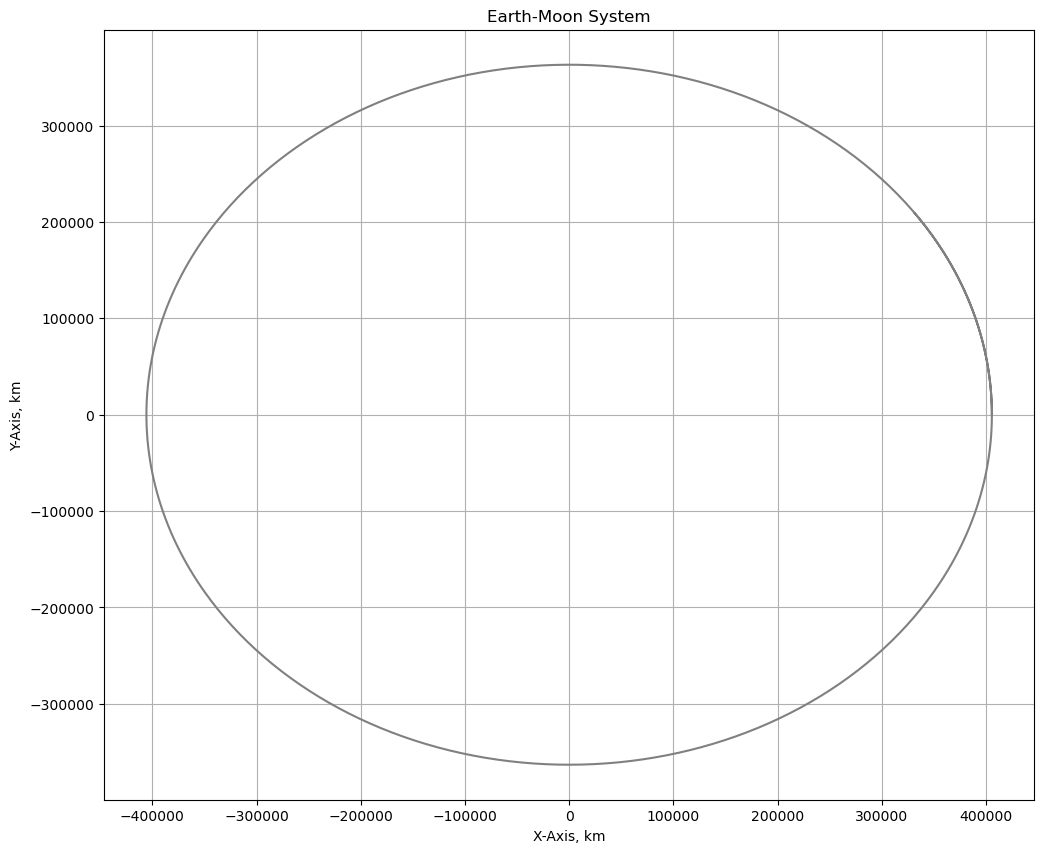

In [213]:
t = np.arange(0,alloted_time)
earth_moon_distanceX = (moon_apogee)*np.cos((2*pi*t)/(earth_rotation*moon_orbit)) # X component of Earth-Moon distance
earth_moon_distanceY = (moon_perigee)*np.sin((2*pi*t)/(earth_rotation*moon_orbit)) # Y component of Earth-Moon distance
earth_moon_distance = ((earth_moon_distanceX)**2) + ((earth_moon_distanceY)**2) # Earth-Center-Moon Distance

plt.figure(figsize=(12,10))
plt.plot(earth_moon_distanceX, earth_moon_distanceY, color="grey", label="Moon Orbit")
# plt.plot(C_mX, C_mY, label="Earth Orbit")
plt.xlabel("X-Axis, km")
plt.ylabel("Y-Axis, km")
# plt.legend
plt.title("Earth-Moon System")
plt.grid()
plt.show()

In [206]:
# C_m = (M_m*D_Em)/(M_m + M_E) # Earth-Center-Moon Center of Mass, km
# C_mX = (C_m)*np.cos((2*pi*t)/(P_E*T_m))
# C_mY = (C_m)*np.sin((2*pi*t)/(P_E*T_m))

# plt.figure()
# plt.plot(C_mX, C_mY, label="Earth Orbit")
# plt.xlabel("X-Axis, km")
# plt.ylabel("Y-Axis, km")
# plt.title("Earth Orbiting Around center of mass between Moon and Earth")
# plt.show()

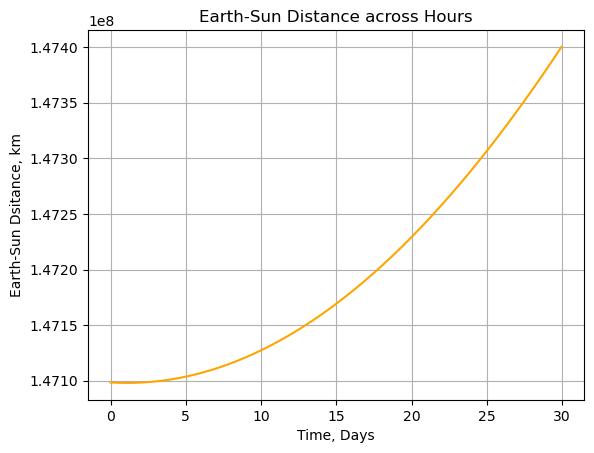

In [214]:
earth_sun_distance = (earth_sun_amplitude)*np.cos((2*(pi)*t)/(earth_rotation*earth_orbit) + pi - ((2*pi)/(earth_rotation*14))) + (earth_aphelion-earth_sun_amplitude) 
# The Sun does exert some tides on the Earth, so it will be helpful here. Measures the start of the year (two weeks before perihelion)

plt.figure()
plt.plot(t/earth_rotation, earth_sun_distance, color='orange')
plt.xlabel("Time, Days")
plt.ylabel("Earth-Sun Dsitance, km")
plt.title("Earth-Sun Distance across Hours")
plt.grid()
plt.show()

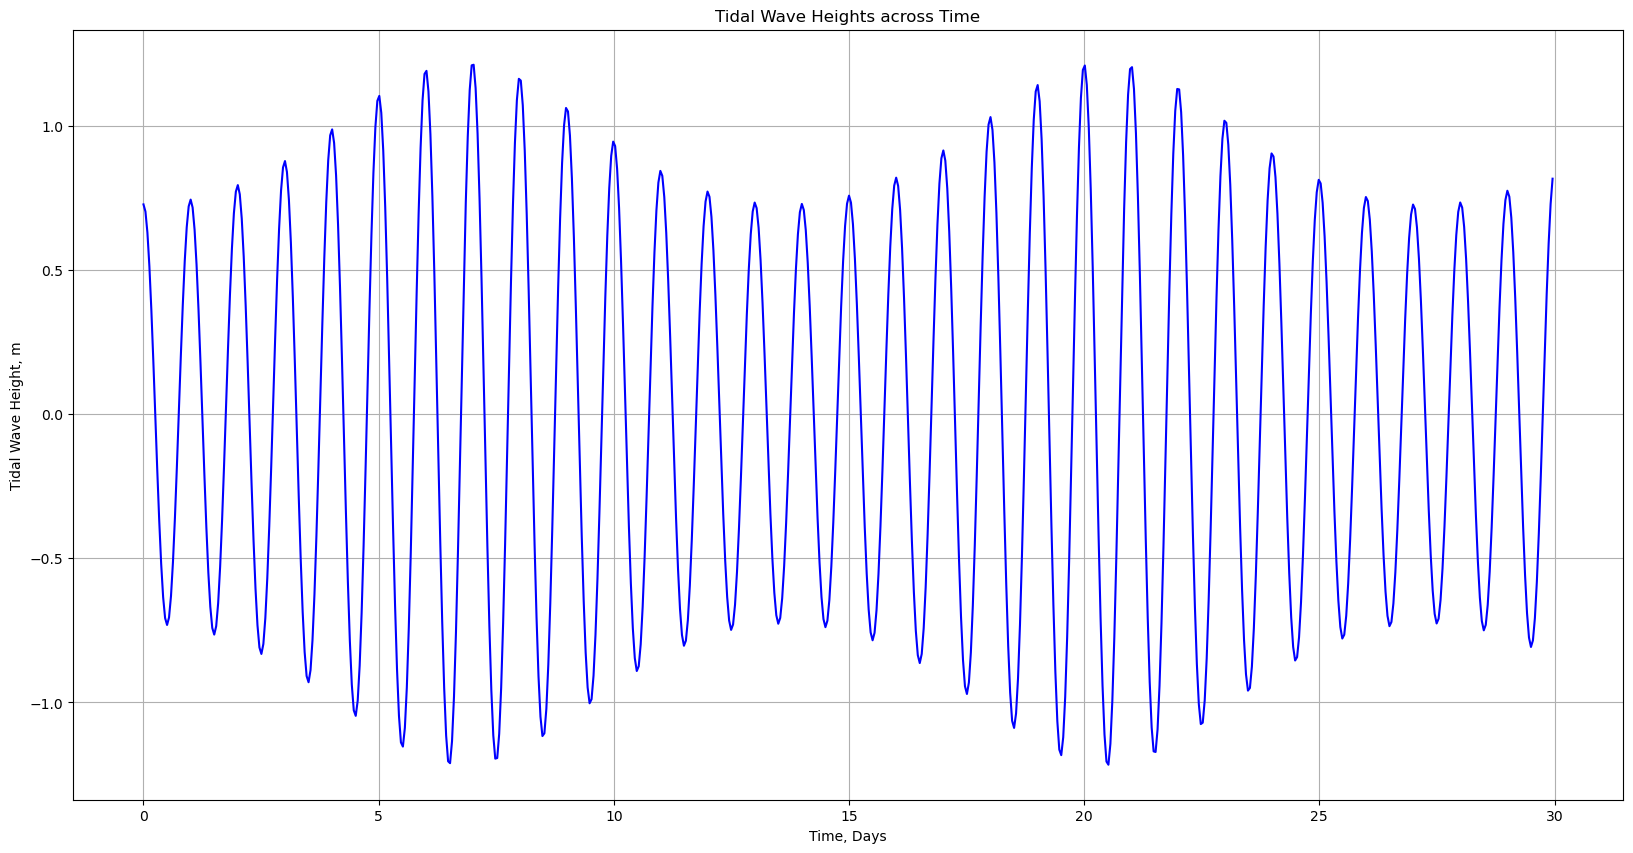

In [225]:
tidal_wave_height_by_moon = (10**(17))*((3*G*moon_mass*((earth_radius*1000)**2))/(2*g*((earth_moon_distance*1000)**3)))*(np.cos((2*(pi)*t)/(earth_rotation)))*np.cos(angle)
tidal_wave_height_by_sun = ((3*G*sun_mass*((earth_radius*1000)**2))/(2*g*((earth_sun_distance*1000)**3)))*np.cos((2*(pi)*t)/(earth_rotation))*np.cos(angle)
tidal_wave_height = tidal_wave_height_by_moon + tidal_wave_height_by_sun
# For some strange reason, and I still have no idea why, the moon tidal wave is on factors of 10^-17 according to the graph, so I just multiplied the graph by 10^17 to fix it.

plt.figure(figsize=(20,10))
plt.plot(t/earth_rotation, tidal_wave_height, color="blue")
plt.xlabel("Time, Days")
plt.ylabel("Tidal Wave Height, m")
plt.title("Tidal Wave Heights across Time")
plt.grid()
plt.show()

In [223]:
planet_mass = 7.76*(10**24) # Earth Mass, kg
planet_rotation = 23.9333 # Earth Rotation Period, hours
planet_radius = 6378 # Earth Radius, km
planet_angle = (0)*pi/180
g = (G*planet_mass)/((planet_radius*1000)**2) # m/s^2 

star_mass = (1.989*(10**30))*(10**8) # Sun Mass, kg
planet_star_distance = 150000000 # km
planet_orbit = (((4*(pi**2)*(((planet_star_distance)*1000)**2))/(G*(star_mass+planet_mass)))**1/2)/10 # Earth Orbital Period, days

alloted_time = planet_orbit

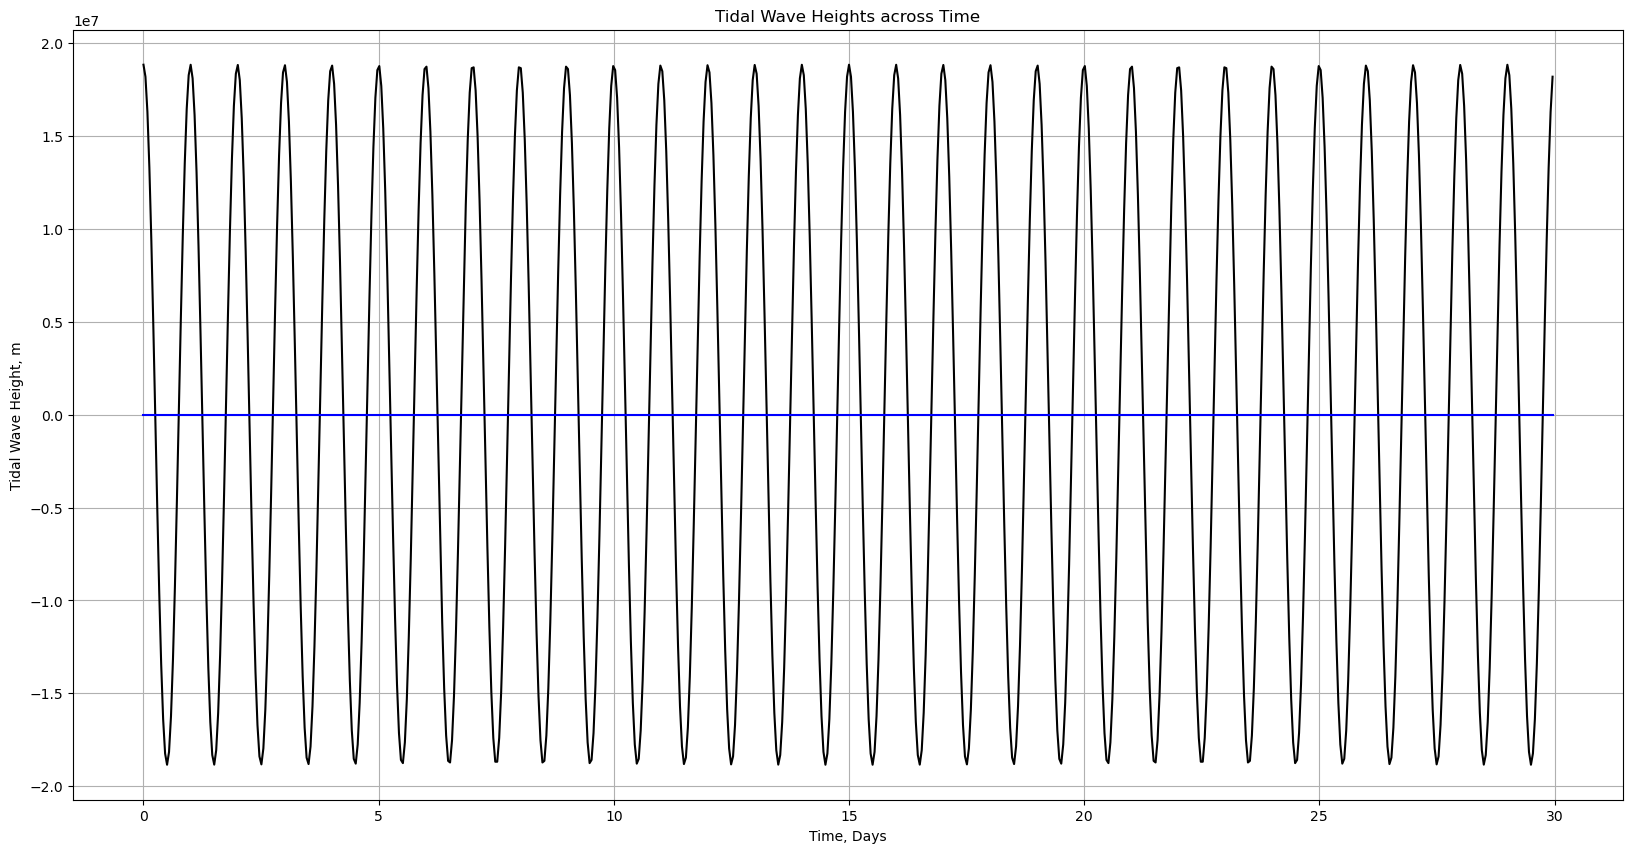

In [222]:
tidal_wave = ((3*G*star_mass*((planet_radius*1000)**2))/(2*g*((150000000*1000)**3)))*np.cos((2*(pi)*t)/(planet_rotation))*np.cos(planet_angle)

plt.figure(figsize=(20,10))
plt.plot(t/planet_rotation, tidal_wave, color="black")
plt.plot(t/earth_rotation, tidal_wave_height, color="blue")
plt.xlabel("Time, Days")
plt.ylabel("Tidal Wave Height, m")
plt.title("Tidal Wave Heights across Time")
plt.grid()
plt.show()

#Those certaintly aren't mountains, although their heights are pretty similar!